Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
No

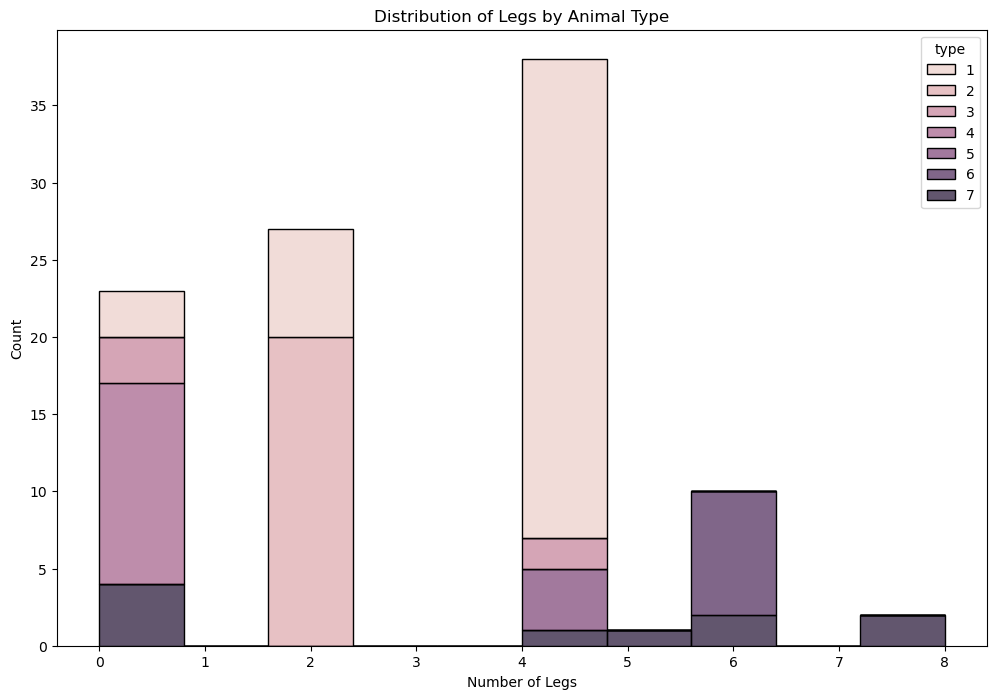

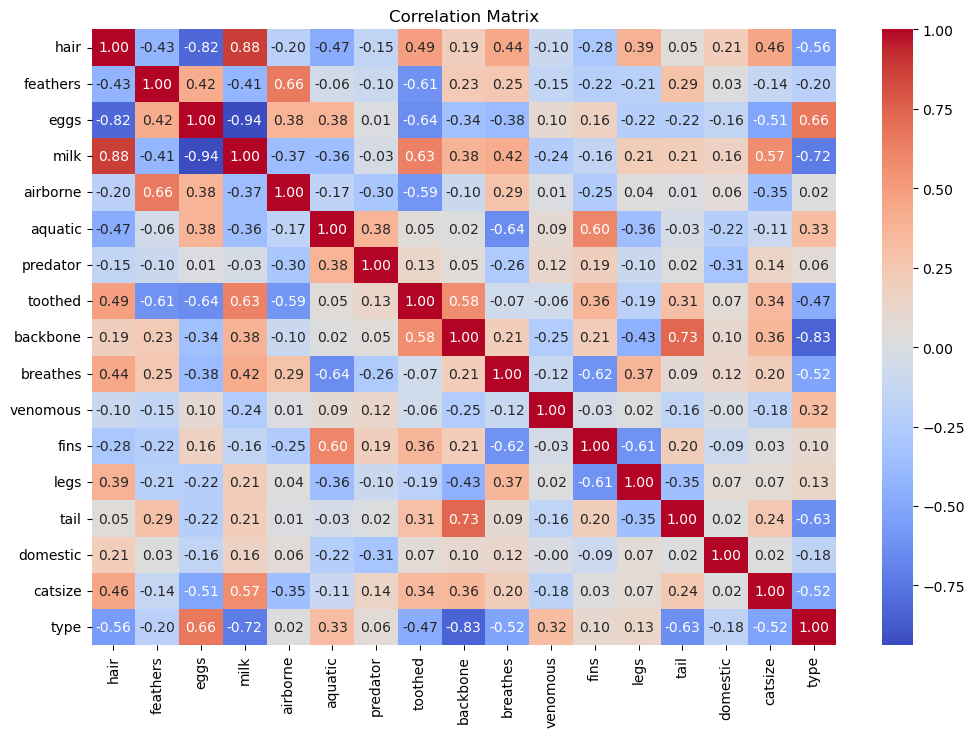

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\shiva\Downloads\KNN\KNN\Zoo.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='legs', hue='type', multiple='stack')
plt.title('Distribution of Legs by Animal Type')
plt.xlabel('Number of Legs')
plt.ylabel('Count')
plt.show()

# Investigate feature correlations
correlation_matrix = data.drop(columns=['animal name']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Drop non-numeric columns for preprocessing
numeric_data = data.drop(columns=['animal name'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Handle outliers (if necessary)
# (You can add outlier handling code here if needed)

# Split the dataset into training and testing sets
X = data_imputed.drop(columns=['type'])
y = data_imputed['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test_scaled)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate classifier performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Classifier Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


KNN Classifier Performance:
Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


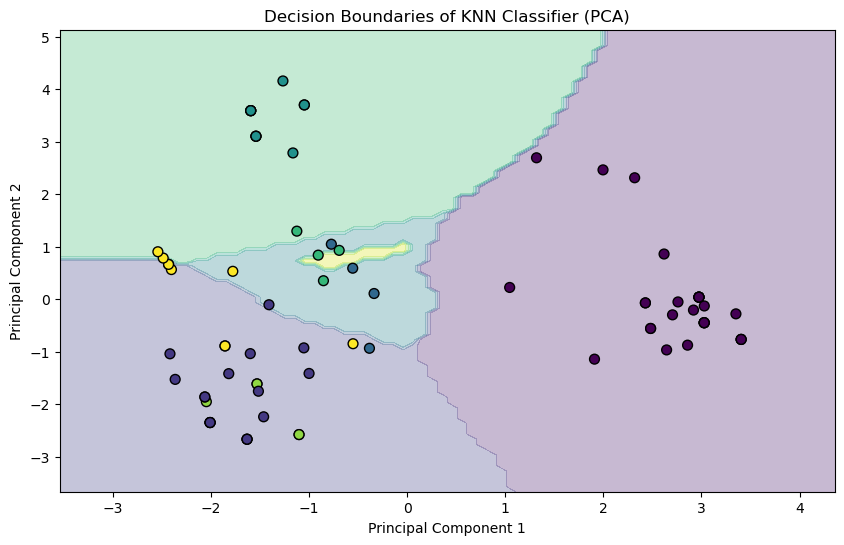

In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Define the ranges for the meshgrid covering the first two principal components
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create the meshgrid using the ranges
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Transform meshgrid points back to original feature space
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)

# Predict class labels for each point in the meshgrid
Z = knn_classifier.predict(mesh_points_original)

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=50, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of KNN Classifier (PCA)')
plt.show()
